In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [2]:
appn = pdr.get_data_yahoo('APPN','2019-05-31')
appn.drop('Adj Close', axis=1, inplace=True)
appn.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-30,36.376999,35.009998,35.259998,36.119999,421200
2019-05-31,36.520000,35.436001,35.520000,36.130001,331800
2019-06-03,36.570000,32.650002,36.000000,33.299999,677900
2019-06-04,34.560001,33.459999,33.919998,34.360001,507700
2019-06-05,34.790001,33.040001,34.540001,34.730000,445500


In [3]:
appn['9-day'] = appn['Close'].rolling(9).mean()
appn['21-day'] = appn['Close'].rolling(21).mean()
appn['Change'] = np.log(appn.Close / appn.Close.shift())
appn.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change
Date,,,,,,,,
2021-05-26,86.699997,83.209999,83.470001,85.820000,676200,83.315555,94.328094,0.032689
2021-05-27,88.830002,83.989998,85.849998,88.360001,587600,83.882222,92.085237,0.029167
2021-05-28,97.760002,89.169998,89.250000,90.480003,1281400,84.880000,90.346190,0.023709
2021-06-01,92.139999,84.900002,90.220001,87.580002,979500,85.348889,88.746190,-0.032576
2021-06-02,94.084999,87.061600,86.919998,93.970001,833354,86.631111,87.721428,0.070423


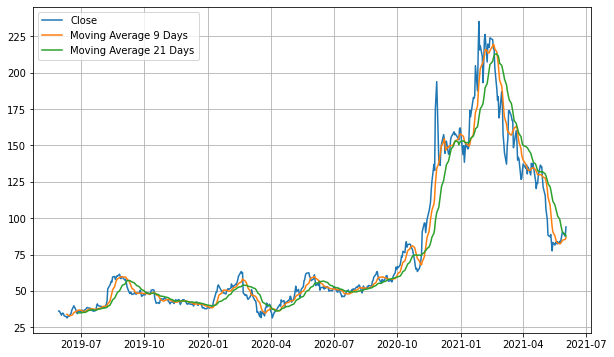

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'],label='Close')
plt.plot(appn['9-day'],label='Moving Average 9 Days')
plt.plot(appn['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in the changing period

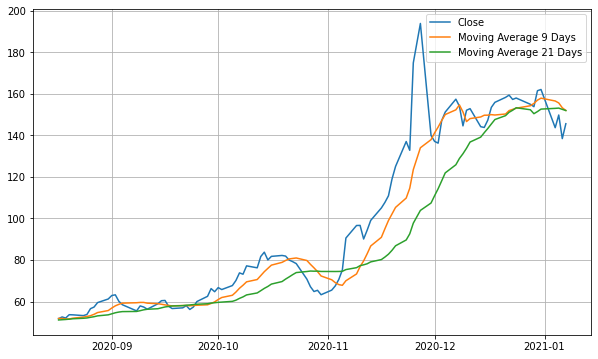

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'][-200:-100],label='Close')
plt.plot(appn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(appn['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

In [6]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position'] = np.where(appn['9-day'] > appn['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position'] = np.where(appn['9-day'] < appn['21-day'],-1,appn['position'])

<AxesSubplot:xlabel='Date'>

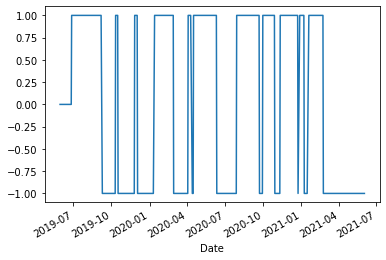

In [7]:
appn['position'].plot()

<AxesSubplot:xlabel='Date'>

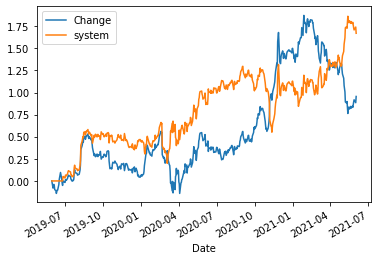

In [8]:
# Whether we are making money with this system
appn['system'] = appn['position'] * appn['Change']
appn[['Change','system']].cumsum().plot()